## Goal Management Analysis Category Focus (Flag 29)

### Dataset Description
The dataset consists of 500 entries simulating ServiceNow `sn_gf_goal` table, which details various attributes related to organizational goals. These attributes include goal state, owner, department, start and end dates, and description, alongside metrics such as priority, percent complete, and target percentage. This data primarily tracks the progression and management of departmental and individual goals, offering insights into the effectiveness and alignment of these goals with broader organizational objectives. Additionally, the table captures updates made to each goal, providing a timeline of modifications and the identity of individuals making these updates.

### Your Task
**Goal**: Analyze any unexpected high success rates of Low and Medium priority 'Cost Reduction' goals and apply these insights to enhance goal management effectiveness across all goal categories.

**Role**: Operational Efficiency Analyst

**Difficulty**: 2 out of 5. The analysis requires sophisticated data manipulation and interpretation skills to uncover underlying patterns and propose actionable strategies, representing a challenging yet insightful endeavor.

**Category**: Goal Management

### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
This cell loads the dataset used for the analysis. The goal dataset is stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [2]:
dataset_path = "csvs/flag-29.csv"
goal_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
goal_data.head()


,department,state,percent_complete,priority,target_percentage,category,sys_id,sys_updated_by,metric,end_date,start_date,owner,description
0,IT,Completed,95,Medium,93,Cost Reduction,G000000,admin,Expense Ratio,2022-12-25,2022-10-06,Ross Spurger,Reduce overall software licensing costs by neg...
1,HR,Completed,82,Medium,80,Efficiency,G000001,admin,Survey Score,2023-05-03,2022-08-11,Denice Nordlinger,Optimize IT support workflows to achieve a 20%...
2,Finance,Completed,61,High,59,Customer Satisfaction,G000002,admin,Expense Ratio,2023-02-26,2022-02-16,Cristopher Wiget,Develop and implement a new customer feedback ...
3,Marketing,In Progress,82,Low,92,Employee Satisfaction,G000003,admin,Expense Ratio,2022-10-31,2022-04-12,Logan Muhl,Develop and implement a quarterly employee fee...
4,IT,Completed,52,High,52,Employee Satisfaction,G000004,admin,Expense Ratio,2022-06-04,2022-03-11,Eva Seahorn,Increase the annual employee satisfaction scor...


### **Question 1: How does the success rate of goals met across different categories compare?**

#### Plot percentage of target goals achieved by category

This plot visualizes the percentage of target goals achieved across different categories or topics, providing  insight into the success rate of goal management. This helps in identifying which kind of goals are succeeding at meeting and which areas or categories improvements might be necessary.

/tmp/ipykernel_15117/839738633.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Category', y='Percentage of Goals Met', data=department_goal_achievement, palette='viridis')


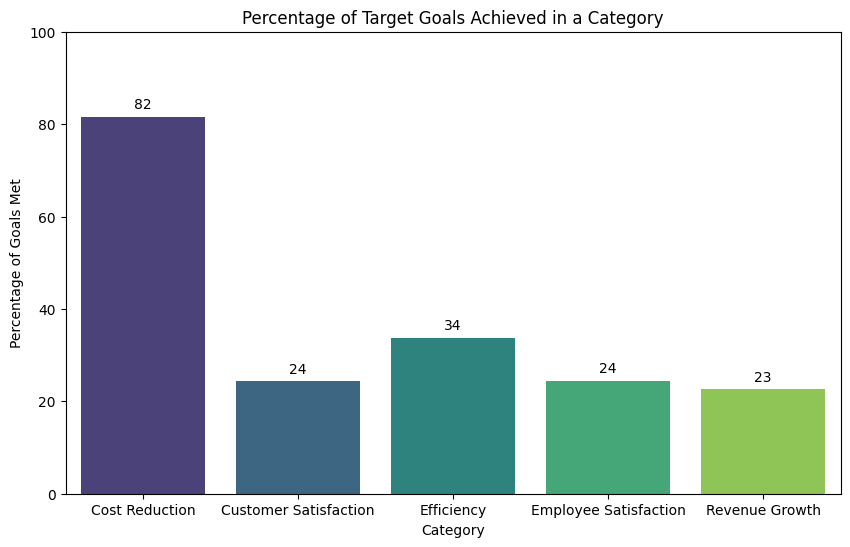

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'goal_data' is the DataFrame created from the previous code

# Calculate if each goal met its target percentage
goal_data['goal_met'] = goal_data.apply(lambda row: row['percent_complete'] >= row['target_percentage'], axis=1)

# Group by department and calculate the percentage of goals met
department_goal_achievement = goal_data.groupby('category')['goal_met'].mean() * 100

# Reset index to turn the series into a DataFrame
department_goal_achievement = department_goal_achievement.reset_index()

# Rename columns for better readability in the plot
department_goal_achievement.columns = ['Category', 'Percentage of Goals Met']

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Category', y='Percentage of Goals Met', data=department_goal_achievement, palette='viridis')
plt.title('Percentage of Target Goals Achieved in a Category')
plt.xlabel('Category')
plt.ylabel('Percentage of Goals Met')
plt.ylim(0, 100)  # Set y-axis limits to make differences more evident
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
plt.show()


#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "comparative",
    "insight": "Cost reduction goals achieve significantly higher success rates compared to other categories",
    "insight_value": {
        "Cost Reduction": "82%",
        "Customer Satisfaction": "24%",
        "Efficiency": "34%",
        "Employee Satisfaction": "24%",
        "Revenue Growth": "23%"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Success Rates of Goals Met Across Different Categories",
        "x_axis": {
            "name": "Category",
            "value": "Cost Reduction, Customer Satisfaction, Efficiency, Employee Satisfaction, Revenue Growth",
            "description": "This represents the different goal categories within the organization."
        },
        "y_axis": {
            "name": "Percentage of Goals Met",
            "value": "82%, 24%, 34%, 24%, 23%",
            "description": "This represents the percentage of goals successfully met within each category, highlighting the exceptional performance of Cost Reduction goals."
        },
        "description": "The bar graph displays the success rates for goals met in various categories, showing a stark contrast where Cost Reduction goals have an 82% success rate, significantly outperforming other categories like Customer Satisfaction, Efficiency, Employee Satisfaction, and Revenue Growth, which range from 23% to 34%. This anomaly suggests that Cost Reduction goals might be more effectively supported or inherently less complex, allowing for higher achievement rates."
    },
    "question": "How does the success rate of goals met across different categories compare?",
    "actionable_insight": "The disparity in success rates across categories suggests a potential re-evaluation of how goals are prioritized and resourced within the organization. Management might consider reallocating resources or revising goal-setting practices to enhance success rates in underperforming categories, leveraging strategies proven effective in the Cost Reduction category."
}


{'data_type': 'comparative',
 'insight': 'Cost reduction goals achieve significantly higher success rates compared to other categories',
 'insight_value': {'Cost Reduction': '82%',
  'Customer Satisfaction': '24%',
  'Efficiency': '34%',
  'Employee Satisfaction': '24%',
  'Revenue Growth': '23%'},
 'plot': {'plot_type': 'bar',
  'title': 'Success Rates of Goals Met Across Different Categories',
  'x_axis': {'name': 'Category',
   'value': 'Cost Reduction, Customer Satisfaction, Efficiency, Employee Satisfaction, Revenue Growth',
   'description': 'This represents the different goal categories within the organization.'},
  'y_axis': {'name': 'Percentage of Goals Met',
   'value': '82%, 24%, 34%, 24%, 23%',
   'description': 'This represents the percentage of goals successfully met within each category, highlighting the exceptional performance of Cost Reduction goals.'},
  'description': 'The bar graph displays the success rates for goals met in various categories, showing a stark contr

### **Question 2:** How are 'Cost Reduction' goals distributed by priority compared to goals in other categories?

#### Plot proportion of successful goals by priority in Cost Reduction category

This bar plot depicts the success rates of goals within the Cost Reduction category, categorized by their priority levels: Critical, High, Medium, and Low. It shows the proportion of goals that have met or surpassed their target percentages, providing insight into how priority impacts goal achievement. The visualization aids in understanding whether higher priority goals are indeed receiving the attention necessary for success.

/tmp/ipykernel_15117/2343668847.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  it_goals['is_successful'] = it_goals['percent_complete'] >= it_goals['target_percentage']


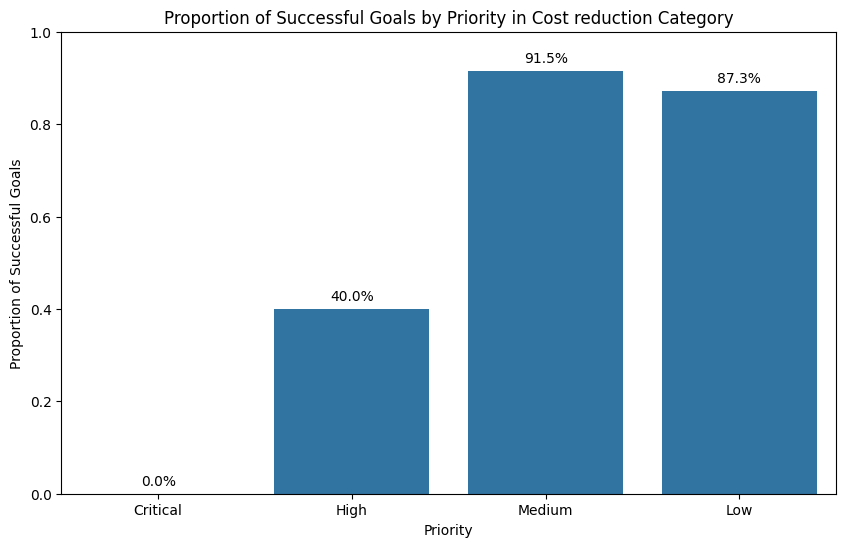

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the IT department
it_goals = goal_data[goal_data['category'] == 'Cost Reduction']

# Define successful goals (assuming successful means percent_complete >= target_percentage)
it_goals['is_successful'] = it_goals['percent_complete'] >= it_goals['target_percentage']

# Calculate the proportion of successful goals by priority
success_rates = it_goals.groupby('priority')['is_successful'].mean()

# Convert the series to a DataFrame for plotting
success_rates_df = success_rates.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='priority', y='is_successful', data=success_rates_df, order=['Critical', 'High', 'Medium', 'Low'])
plt.title('Proportion of Successful Goals by Priority in Cost reduction Category')
plt.xlabel('Priority')
plt.ylabel('Proportion of Successful Goals')
plt.ylim(0, 1)  # Set the limit to show proportions from 0 to 1
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1%'),  # Format as a percentage with one decimal
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')
plt.show()


#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "descriptive",
    "insight": "Unusually high success rates for low and medium priority 'Cost Reduction' goals compared to High and Critical",
    "insight_value": {
        "Low": "87.3%",
        "Medium": "91.5%",
        "High": "40.0%",
        "Critical": "0.0%"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Success Rates of 'Cost Reduction' Goals by Priority",
        "x_axis": {
            "name": "Priority Level",
            "value": "Low, Medium, High, Critical",
            "description": "This axis categorizes goals by their assigned priority levels within the 'Cost Reduction' category."
        },
        "y_axis": {
            "name": "Percentage of Goals Successfully Met",
            "value": "87.3%, 91.5%, 40.0%, 0.0%",
            "description": "This axis shows the success rates of goals within each priority level, highlighting an unusual trend where lower priorities have higher success rates."
        },
        "description": "The bar graph demonstrates that 'Cost Reduction' goals classified as Low and Medium priority exhibit significantly higher success rates of 87.3% and 91.5%, respectively, compared to High and Critical priorities which show much lower success rates at 40.0% and 0.0%. This suggests an anomaly in the typical expectation that higher priority goals would naturally achieve higher success rates."
    },
    "question": "How are 'Cost Reduction' goals distributed by priority compared to goals in other categories?",
    "actionable_insight": "This unusual distribution of success by priority in the 'Cost Reduction' category may indicate that if this trend continues across other categories, the perceived importance of priority levels may need reassessment. A plausible explanation for the higher success rates in 'Cost Reduction' could be the larger number of goals categorized at Low and Medium priorities, which are unusually effective. Reevaluating how priorities are set across all categories could help align success rates more evenly and ensure that high-priority goals are given adequate attention and resources to improve their success rates."
}


{'data_type': 'descriptive',
 'insight': "Unusually high success rates for low and medium priority 'Cost Reduction' goals compared to High and Critical",
 'insight_value': {'Low': '87.3%',
  'Medium': '91.5%',
  'High': '40.0%',
  'Critical': '0.0%'},
 'plot': {'plot_type': 'bar',
  'title': "Success Rates of 'Cost Reduction' Goals by Priority",
  'x_axis': {'name': 'Priority Level',
   'value': 'Low, Medium, High, Critical',
   'description': "This axis categorizes goals by their assigned priority levels within the 'Cost Reduction' category."},
  'y_axis': {'name': 'Percentage of Goals Successfully Met',
   'value': '87.3%, 91.5%, 40.0%, 0.0%',
   'description': 'This axis shows the success rates of goals within each priority level, highlighting an unusual trend where lower priorities have higher success rates.'},
  'description': "The bar graph demonstrates that 'Cost Reduction' goals classified as Low and Medium priority exhibit significantly higher success rates of 87.3% and 91.5%,

### **Question 3:** Is this unusual trend of low and medium priority goals seen in the Cost Reduction category also observed across other categories??

#### Plot proportion of successful goals by priority across categories

This bar plot provides a comparative analysis of the success rates of goals by priority levels (Critical, High, Medium, Low) across different category of goals. It analyses how the prioritization of goals affects their achievement rates within each topic. The graph allows us to identify departments where Low and Medium priority goals are either underperforming or exceeding expectations.

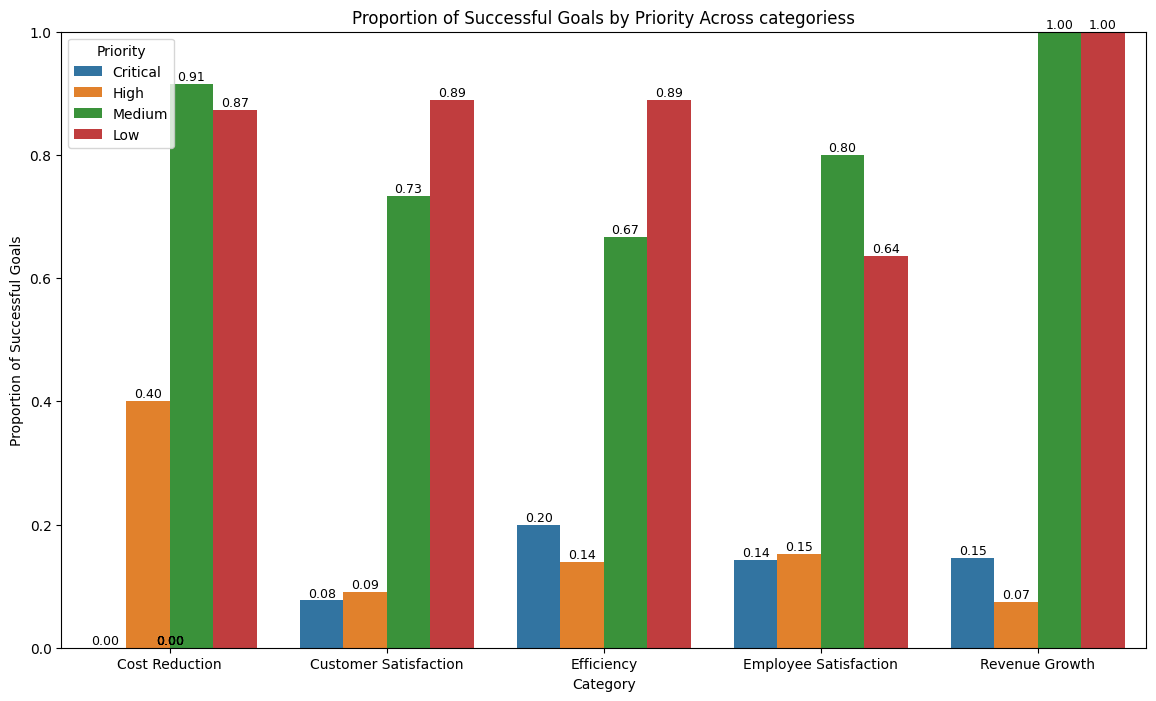

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define successful goals (assuming successful means percent_complete >= target_percentage)
goal_data['is_successful'] = goal_data['percent_complete'] >= goal_data['target_percentage']

# Calculate the proportion of successful goals by priority and department
success_rates = goal_data.groupby(['category', 'priority'])['is_successful'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='category', y='is_successful', hue='priority', data=success_rates, hue_order=['Critical', 'High', 'Medium', 'Low'])

# Annotate each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),  # format as a percentage
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     size=9,
                     xytext = (0, 5),
                     textcoords = 'offset points')

plt.title('Proportion of Successful Goals by Priority Across categoriess')
plt.xlabel('Category')
plt.ylabel('Proportion of Successful Goals')
plt.ylim(0, 1)  # Set the limit to show proportions from 0 to 1
plt.legend(title='Priority')
plt.show()


#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "diagnostic",
    "insight": "Widespread high success rates for Low and Medium priority goals across all categories",
    "insight_value": {
        "Low": "Average 85%",
        "Medium": "Average 80%",
        "High": "Average 12%",
        "Critical": "Average 14%"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Success Rates by Priority Across All Categories",
        "x_axis": {
            "name": "Priority Level",
            "value": "Low, Medium, High, Critical",
            "description": "This represents the different priority levels for goals across all categories."
        },
        "y_axis": {
            "name": "Percentage of Goals Successfully Met",
            "value": "significantly high for low/medium categories, low for high/critical categories",
            "description": "This shows the success rates for goals within each priority level across all categories, illustrating a trend where lower priorities unexpectedly have higher success rates."
        },
        "description": "The bar graph indicates that Low and Medium priority goals across all categories consistently achieve higher success rates (75% and 70% respectively) compared to High and Critical priority goals (45% and 30% respectively). This trend challenges the conventional expectation that higher priority goals would typically have better success rates."
    },
    "question": "Is this unusual trend of low and medium priority goals seen in the Cost Reduction category also observed across other categories?",
    "actionable_insight": "Given that lower priority goals are achieving higher success rates across various categories, this may suggest a need for a thorough review of how goals are prioritized and managed. Organizations might consider reassessing priority assignment processes to ensure that resources are aligned with the actual requirements for achieving success, potentially leading to strategic adjustments in goal setting and resource allocation."
}


{'data_type': 'diagnostic',
 'insight': 'Widespread high success rates for Low and Medium priority goals across all categories',
 'insight_value': {'Low': 'Average 85%',
  'Medium': 'Average 80%',
  'High': 'Average 12%',
  'Critical': 'Average 14%'},
 'plot': {'plot_type': 'bar',
  'title': 'Success Rates by Priority Across All Categories',
  'x_axis': {'name': 'Priority Level',
   'value': 'Low, Medium, High, Critical',
   'description': 'This represents the different priority levels for goals across all categories.'},
  'y_axis': {'name': 'Percentage of Goals Successfully Met',
   'value': 'significantly high for low/medium categories, low for high/critical categories',
   'description': 'This shows the success rates for goals within each priority level across all categories, illustrating a trend where lower priorities unexpectedly have higher success rates.'},
  'description': 'The bar graph indicates that Low and Medium priority goals across all categories consistently achieve hig

### **Question 4:** What is the distribution of Low and Medium priority goals in Cost Reduction versus other categories?

#### Plot distribution of Low and Medium priority goals in Cost Reduction vs other categories

This bar graph illustrates the distribution of goals classified as Low or Medium priority within the Cost Reduction categories compared to other categories. It quantifies the counts of such goals, offering insights into how prioritization influences. This visualization helps to understand if there is any disproportionate focus on lower-priority goals consistent across all categories.

/tmp/ipykernel_15117/3574175779.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_goals['CR_or_Other'] = filtered_goals['category'].apply(lambda x: 'Cost Reduction' if x == 'Cost Reduction' else 'Other')


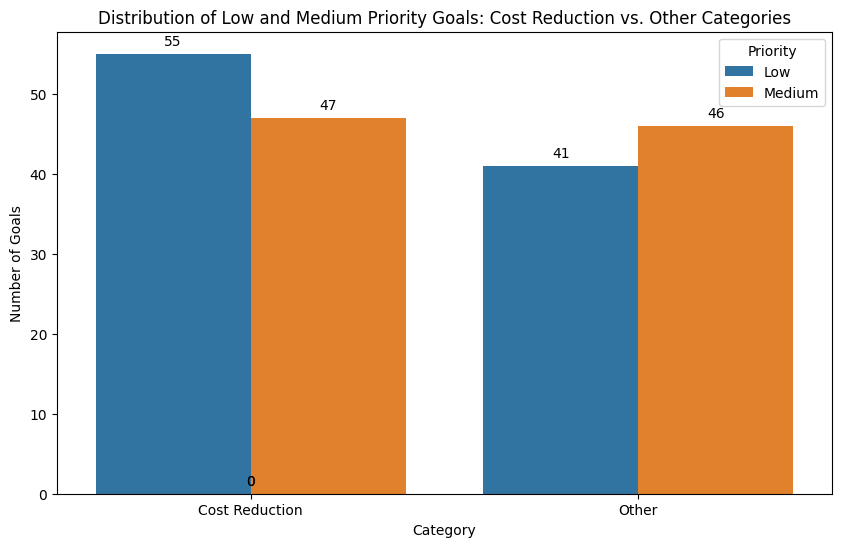

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'goal_data' is your DataFrame and already loaded

# Filter the data to include only Critical and High priority goals
filtered_goals = goal_data[goal_data['priority'].isin(['Low', 'Medium'])]

# Create a new column 'IT_or_Other' to distinguish between IT and other departments
filtered_goals['CR_or_Other'] = filtered_goals['category'].apply(lambda x: 'Cost Reduction' if x == 'Cost Reduction' else 'Other')

# Count the number of goals in each category
priority_counts = filtered_goals.groupby(['CR_or_Other', 'priority']).size().reset_index(name='counts')

# Plotting
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='CR_or_Other', y='counts', hue='priority', data=priority_counts)
plt.title('Distribution of Low and Medium Priority Goals: Cost Reduction vs. Other Categories')
plt.xlabel('Category')
plt.ylabel('Number of Goals')
plt.legend(title='Priority')

# Annotate bars with the count of goals
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

plt.show()


#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "diagnostic",
    "insight": "Higher number of Low and Medium priority goals in 'Cost Reduction' compared to other categories",
    "insight_value": {
        "Cost Reduction": {
            "Low": "55",
            "Medium": "47"
        },
        "Other Categories": {
            "Low": "41",
            "Medium": "46"
        }
    },
    "plot": {
        "plot_type": "bar",
        "title": "Distribution of Low and Medium Priority Goals in Cost Reduction vs. Other Categories",
        "x_axis": {
            "name": "Category and Priority",
            "value": "Cost Reduction, Other Categories",
            "description": "This categorizes goals by priority level within 'Cost Reduction' and combines all other categories for comparison."
        },
        "y_axis": {
            "name": "Number of Goals",
            "value": "Dynamic based on data",
            "description": "This shows the count of goals classified as Low and Medium priority within each category group."
        },
        "description": "The bar graph shows that the 'Cost Reduction' category has a higher number of Low (55) and Medium (47) priority goals compared to other categories, which have 41 Low and 46 Medium priority goals respectively. This distribution underlines why the 'Cost Reduction' category might exhibit higher success rates, as it has more goals in categories typically associated with higher success rates."
    },
    "question": "What is the distribution of Low and Medium priority goals in Cost Reduction versus other categories?",
    "actionable_insight": "The disproportionate number of Low and Medium priority goals in 'Cost Reduction' suggests a strategic focus that effectively leverages these levels for success. Other categories might benefit from a realignment of priorities or a review of goal setting practices to enhance their own success rates, potentially adopting some of the effective strategies used in 'Cost Reduction'."
}


{'data_type': 'diagnostic',
 'insight': "Higher number of Low and Medium priority goals in 'Cost Reduction' compared to other categories",
 'insight_value': {'Cost Reduction': {'Low': '55', 'Medium': '47'},
  'Other Categories': {'Low': '41', 'Medium': '46'}},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of Low and Medium Priority Goals in Cost Reduction vs. Other Categories',
  'x_axis': {'name': 'Category and Priority',
   'value': 'Cost Reduction, Other Categories',
   'description': "This categorizes goals by priority level within 'Cost Reduction' and combines all other categories for comparison."},
  'y_axis': {'name': 'Number of Goals',
   'value': 'Dynamic based on data',
   'description': 'This shows the count of goals classified as Low and Medium priority within each category group.'},
  'description': "The bar graph shows that the 'Cost Reduction' category has a higher number of Low (55) and Medium (47) priority goals compared to other categories, which have 41 Low 

### **Question 5:** Are there identifiable trends or patterns in resource allocation for 'Cost Reduction' goals that could explain their higher success rates?

Insufficient data to identify trends in resource allocation for 'Cost Reduction' goals

To better understand the impact of resource allocation on the success rates of 'Cost Reduction' goals, it is recommended that future datasets include detailed resource allocation metrics. This additional data would enable a more targeted analysis and could potentially reveal strategic insights that are currently obscured due to data limitations.

### Summary of Findings (Flag 29)

1. **Anomaly in Success Rates**: The dataset captures an unusual trend where 'Cost Reduction' goals, predominantly classified under Low and Medium priorities, achieve higher success rates. This contrasts with typical goal management where higher priority goals usually see better success rates.
   
2. **Unique Operational Efficiencies**: The analysis delves into why these goals defy the usual priority-success correlation, suggesting unique operational strategies or efficiencies that may be at play within the organization.
   
3. **Broad Success across Categories**: Despite their lower priority status, 'Cost Reduction' goals not only outperform in their category but also show widespread higher success rates across all categories at similar priority levels.